<font size ="8"> <div align="center">**Aparrel Classification using Artificial Neural Networks**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

----------------------
# **Context of the Case Study (Fashion MNIST)**
----------------------

In this practical application notebook, we will work with fashion MNIST dataset to carry out a classification exercise using Artificial Neural Networks.

-----------------------
## **Dataset Description**
---------------------------
The dataset, Fashion MNIST, is a collection of apparel images falling into several classes.

Classes are numbered from 0 to 9 and have the following meanings with Tshirt/Top represented as 0 and an Ankle Boot as 9.

class_names = `['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']`

-------------------------
## **Objective of the Study**
--------------------------
In this exercise, we will create a simple ANN model to classify the images into some categories



### **Importing the libraries and loading the Data**

**Importing the necessary libraries**

In [1]:
# Installing tensorflow
!pip install tensorflow   # Comment out if already installed

In [2]:
# For Building neural Network models
import tensorflow as tf

# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cecking the installed version of tensorflow
tf.__version__

'2.18.0'

**Loading and Preparing the Data for Model training**

> Importing the data from the tf.keras.datasets and preparing the train and the test set.

In [4]:
# Loading the dataset from the MNIST repository
(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Checking the shape of the traning and testing data
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
# Checking the image size of the datapoints
X_train.shape[1] * X_train.shape[2]

784

- This suggests that there are 60000 images of size 28\*28 in the training set and 10000 images of size 28*28 in the test set.
- Note that we will need to flatten these images before fitting an ANN model.
- Let us now explore the classes present in the dataset.

In [7]:
# Checking out the classes in the dataset
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- This suggests that the train set has 10 classes where each class denotes one type of apparel.

**Encoding the target variable**

> The target variable needs to be to one hot encoded to be able to form the training target vector.


In [8]:
# Encoding the target variable to classes
y_train = tf.keras.utils.to_categorical(trainY,num_classes=10)
y_test = tf.keras.utils.to_categorical(testY,num_classes=10)

# Let's have a look at the shapes of all the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [9]:
# Normalizing the dataset
# Since there are pixel values ranging from 0-255, let us divide by 255 to get the new ranges from 0-1

X_train = X_train/255
X_test = X_test/255

### **Visualizating the Dataset**



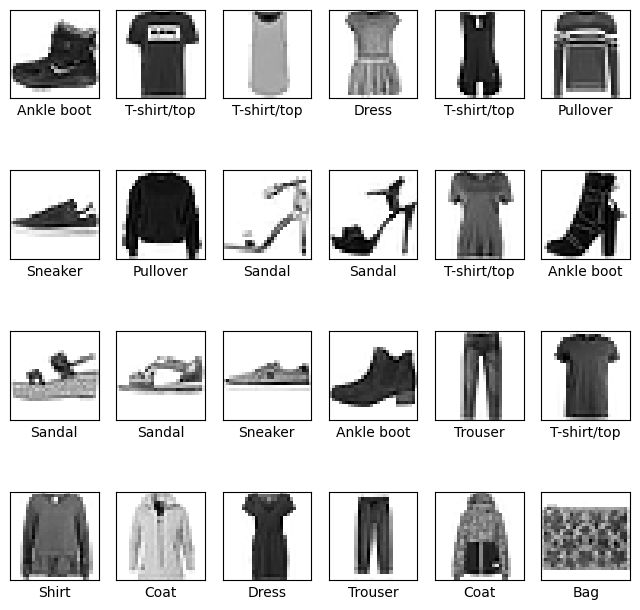

In [10]:
# Visualizing the data items.
# Looking at the first 24 images in the training dataset.


class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

### **Neural Network Model Building**


**Model Architecture**

The neural network model to be trained will have:
 - A layer to flatten the input
 - A hidden layer with 64 nodes (You can play around with this number) and 'relu' activation.
 - Output layer

#### **Model 1**

> **Building the Neural Network architecture**

In [27]:
# Initialize sequential model according to the architecture above

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')   # Remove this and complete the code.
])

In [28]:
# Printing out the model summary
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

**Observations**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
- The Flatten layer simply flattens each image into a size of 784 (28*28) and there is no learning or training at this layer. Hence, the number of parameters is 0 for the Flatten layer.
- Each image in the form of 784 nodes would be the input for the 'dense' layer. Each node of the previous layer would be connected with each node of the current layer. Also, each connection has one weight to learn and each node has one bias. So, the total number of parameters are (784*64)+64 = 50,240.
- Similarly, the last layer - 'dense_1' have (64*10)+10 = 650 parameters.

> **Compiling the model and fitting the training data**

In [29]:
# Compiling the model with specified parameters
model_1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [30]:
# Let us now fit the model
fit_history = model_1.fit(X_train, y_train,validation_split=0.1, verbose=1, epochs=10, batch_size=64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7441 - loss: 0.7492 - val_accuracy: 0.8463 - val_loss: 0.4343
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8528 - loss: 0.4183 - val_accuracy: 0.8580 - val_loss: 0.3937
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8686 - loss: 0.3771 - val_accuracy: 0.8447 - val_loss: 0.4216
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8762 - loss: 0.3512 - val_accuracy: 0.8597 - val_loss: 0.3788
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8812 - loss: 0.3300 - val_accuracy: 0.8735 - val_loss: 0.3480
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8854 - loss: 0.3178 - val_accuracy: 0.8700 - val_loss: 0.3633
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8884 - loss: 0.3039 - val_accuracy: 0.8813 - val_loss: 0.3327
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8975 - loss: 0.2839 - val_accuracy: 0

**Observation**
- We can observe that the model's accuracy increases with the increase in the number of epochs.

> **Evaluating the model's performance on the test set**



In [31]:
# Defining a function to print out the classification performance of the classifier
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [32]:
# Checking the accuracy of the model and predicting the output variable
model_1.evaluate(X_test, y_test, verbose = 1)
test_pred1 = np.argmax(model_1.predict(X_test), axis = 1)
test_pred1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8737 - loss: 0.3532
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.92      0.84      0.88      1000
           4       0.75      0.85      0.80      1000
           5       0.90      0.97      0.94      1000
           6       0.74      0.63      0.68      1000
           7       0.96      0.88      0.92      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



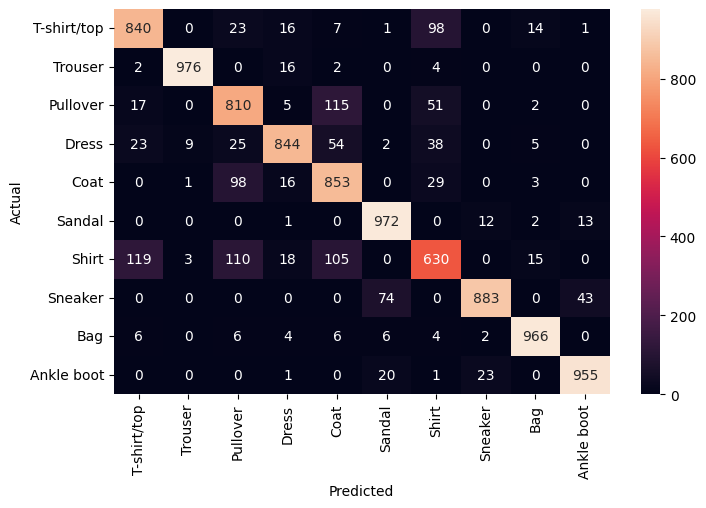

In [33]:
# Checking which category has been correctly classified by the model
metrics_score(testY, test_pred1)

**Observations**
- Class 6 (Shirt) has the lowest recall and precision. The model is not able to identify the shirt. The confusion matrix shows that the model has predicted shirts as T-shirts/top, Pullover, and Coat which is understandable as these items have similar looks.
- Let's try changing the learning rate and train the model for more epochs and see if the model can identify even subtle differences in different objects.

**Further Iterations to model building**
- Change the learning rate and epochs and observe the effect on accuracy on the earlier network.
- Build a bigger network with the new learning rate and epochs.

#### **Model 2**

> **Building the Neural Network architecture**

In [18]:
# Initialize sequential model according to the previous insights

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compiling the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [19]:
# Printing out the model summary
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

**Observation**
- The summary remains the same as the previous model because we have not changed anything about the structure of the NN.

> **Fitting the training data**

In [20]:
# Let us now fit the model
fit_history_2 = model_2.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 2)

Epoch 1/30
844/844 - 5s - 6ms/step - accuracy: 0.8081 - loss: 0.5632 - val_accuracy: 0.8493 - val_loss: 0.4327
Epoch 2/30
844/844 - 4s - 5ms/step - accuracy: 0.8572 - loss: 0.4041 - val_accuracy: 0.8592 - val_loss: 0.3917
Epoch 3/30
844/844 - 6s - 7ms/step - accuracy: 0.8700 - loss: 0.3675 - val_accuracy: 0.8655 - val_loss: 0.3658
Epoch 4/30
844/844 - 4s - 5ms/step - accuracy: 0.8764 - loss: 0.3428 - val_accuracy: 0.8670 - val_loss: 0.3702
Epoch 5/30
844/844 - 3s - 3ms/step - accuracy: 0.8833 - loss: 0.3244 - val_accuracy: 0.8685 - val_loss: 0.3689
Epoch 6/30
844/844 - 3s - 4ms/step - accuracy: 0.8881 - loss: 0.3110 - val_accuracy: 0.8710 - val_loss: 0.3580
Epoch 7/30
844/844 - 5s - 6ms/step - accuracy: 0.8918 - loss: 0.2974 - val_accuracy: 0.8712 - val_loss: 0.3608
Epoch 8/30
844/844 - 3s - 4ms/step - accuracy: 0.8960 - loss: 0.2868 - val_accuracy: 0.8830 - val_loss: 0.3327
Epoch 9/30
844/844 - 5s - 6ms/step - accuracy: 0.8983 - loss: 0.2785 - val_accuracy: 0.8768 - val_loss: 0.3526
E

**Observations**
- We can see that the accuracy of the training data has increased by ~3% but the accuracy on the validation set has increased only by ~0.50% as compared to the model trained with 10 epochs.
- This indicates that if we further increase the number of epochs while keeping everything else the same then the model might start to overfit.

> **Evaluating the model's performance on the test set**


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8799 - loss: 0.4005
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.72      0.78      1000
           3       0.85      0.93      0.88      1000
           4       0.84      0.75      0.79      1000
           5       0.98      0.95      0.96      1000
           6       0.63      0.77      0.69      1000
           7       0.92      0.97      0.95      1000
           8       0.99      0.95      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



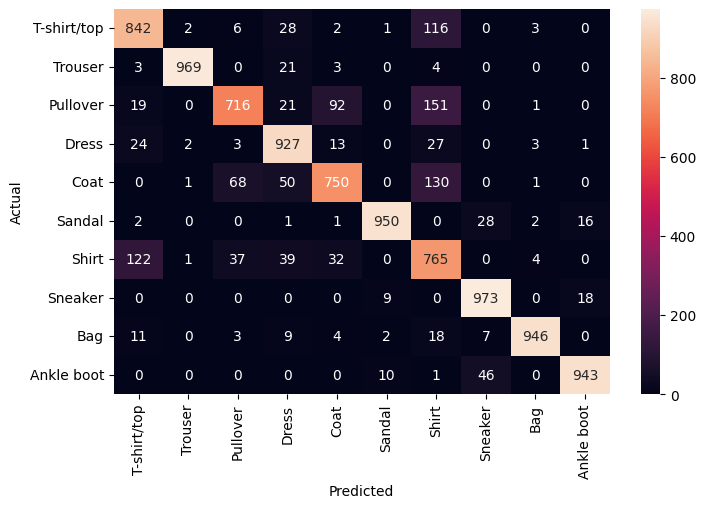

In [21]:
# Checking the accuracy of the classifier
model_2.evaluate(X_test, y_test, verbose = 1)
test_pred2 = np.argmax(model_2.predict(X_test), axis  = 1)
metrics_score(testY, test_pred2)

* Similar to the results of the previous model, the class 6 (`Shirt`) still has the lowest precision and f-score
* For the next iteration, an additional hidden layer with 128 neurons can be added with relu activation function

#### **Model 3**

> **Building the Neural Network architecture**

In [22]:
# Initialize sequential model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  # Remove this and complete the code.
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [23]:
# Checking the model summary
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Observations**
- We can see that the number of parameters has increased by ~2.15 times than the number of parameters in previous models.
- Increasing the number of parameters can significantly increase the training time of the model.

> **Compiling the model and fitting the training data**

In [24]:
# Compiling the model and fitting the dataset
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

fit_history_3 = model_3.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 1)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7647 - loss: 0.6902 - val_accuracy: 0.8492 - val_loss: 0.4142
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8584 - loss: 0.3915 - val_accuracy: 0.8655 - val_loss: 0.3657
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8761 - loss: 0.3431 - val_accuracy: 0.8730 - val_loss: 0.3490
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8810 - loss: 0.3237 - val_accuracy: 0.8763 - val_loss: 0.3404
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8924 - loss: 0.2928 - val_accuracy: 0.8725 - val_loss: 0.3542
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8950 - loss: 0.2826 - val_accuracy: 0.8823 - val_loss: 0.3273
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9017 - loss: 0.2655 - val_accuracy: 0.8765 - val_loss: 0.3308
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9042 - loss: 0.2574 - val_accuracy:

**Observations**
- The validation accuracy of the model has further increased by ~0.71% and the training accuracy has further increased by ~1.4%. So, there is still a hint of overfitting.
- We can play around with hyperparameters of the model or try different layer structures to improve the model performance and reduce the overfitting.
- We can see that accuracy keeps increasing for the test data as the number of epochs increased but validation accuracy has become somewhat constant after 10 epochs.
- This indicates that the model learns the training data more closely after each epoch but cannot replicate the performance on the validation data which is a sign of overfitting.
- The same pattern can be observed for loss as well. It keeps decreasing for the training data with the increase in epochs but becomes somewhat constant for the validation data after 10 epochs.

Now, let's make final predictions on the test data using the last model we built.

> **Making final predictions on the Test Data**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.80      0.82      1000
           3       0.90      0.89      0.89      1000
           4       0.85      0.81      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.73      0.73      0.73      1000
           7       0.96      0.94      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



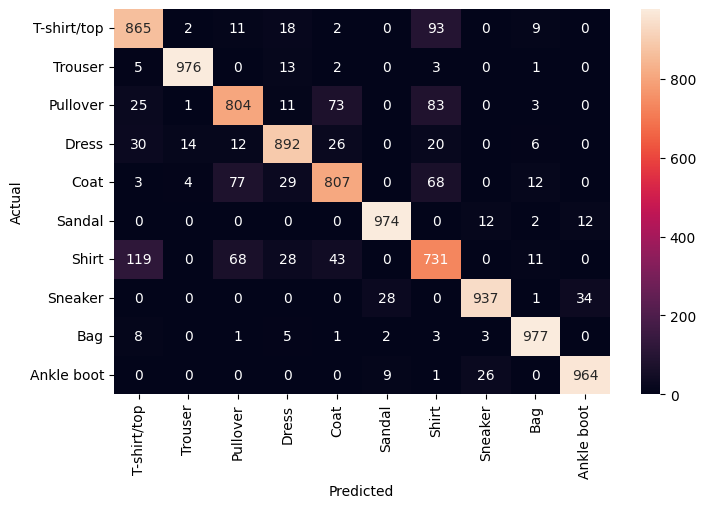

In [25]:
# Predicting the target variable using the 3rd model trained
final_pred = np.argmax(model_3.predict(X_test), axis  = -1)

metrics_score(testY, final_pred)

- The precision and recall for class 6 (Shirt) have increased. The confusion matrix shows that the model is still not able to differentiate between T-shirt/top and Shirt but became better in differentiating Shirt with Pullover and Coat.
- The model has become even better at identifying Trouser. It has an f1-score of 98% for class 1 (Trouser).
- The overall accuracy on the test data is approximately the same as the validation accuracy.



### **Visualizing the images from the test data and Summary**


- We will randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class.
- Higher the probability more confident the model is about the prediction.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


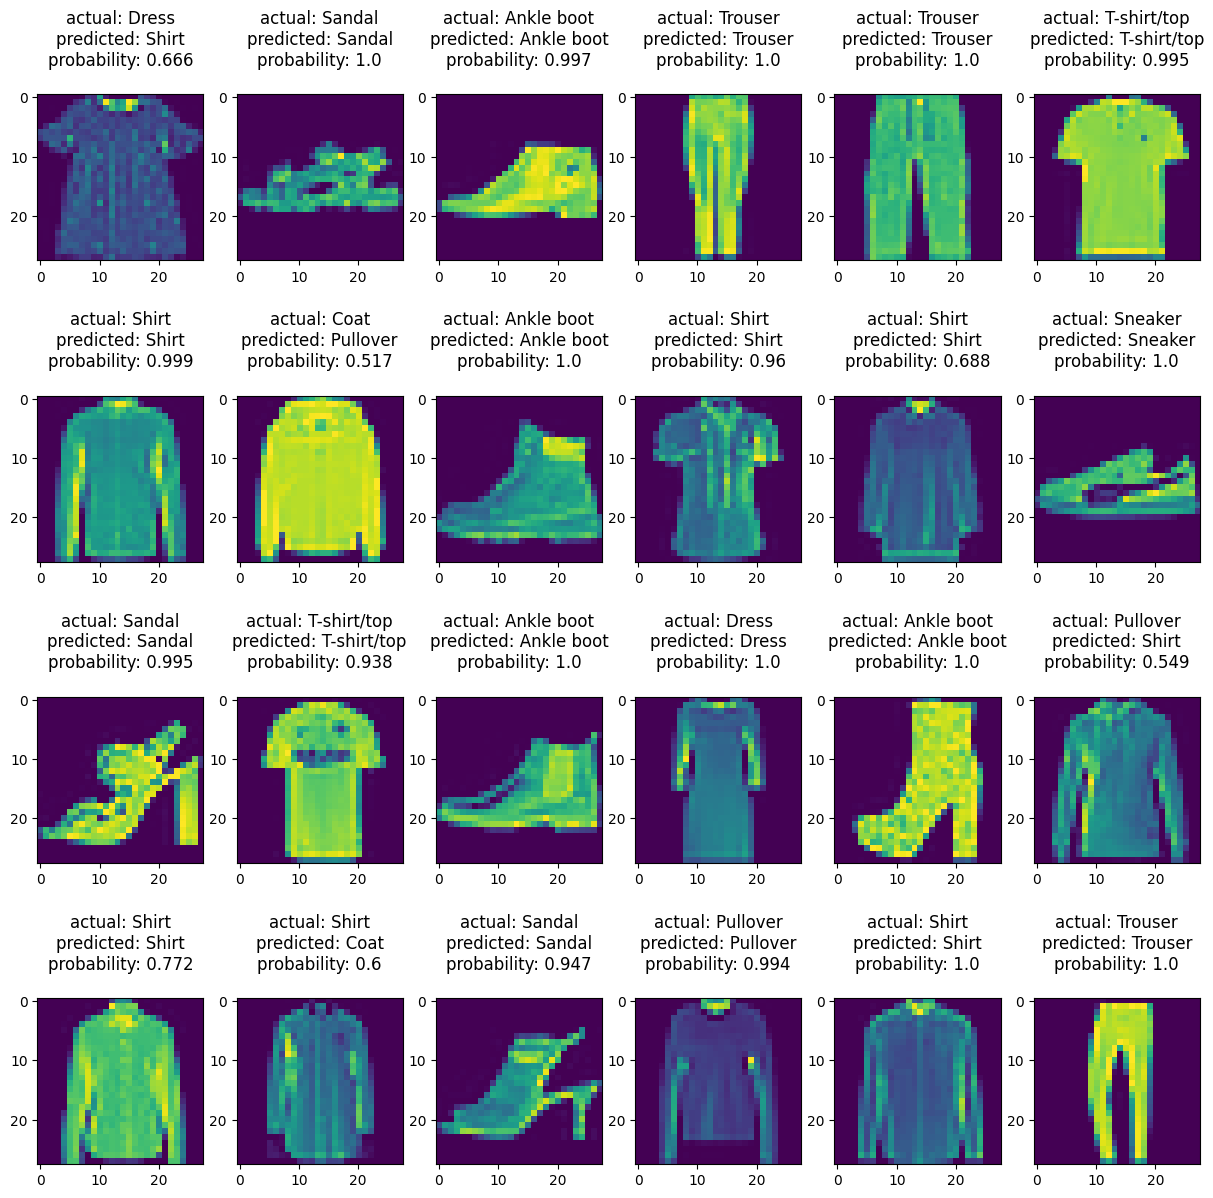

In [26]:
# Plotting out the image figures from the test data
rows = 4
cols = 6
fig = plt.figure(figsize=(15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = class_names_list[final_pred[random_index]]
        true_label = class_names_list[testY[random_index]]
        y_pred_test_max_probas = np.max(model_3.predict(X_test), axis=1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

### **Summary of the Exercise**

- We have trained 3 different models with some changes.
- The plots track the variation in the accuracies and the loss across epochs and allow us to map how better these models generalize.
- We have observed good performance on the train set but there is some amount of overfitting in the models that get more prominent as we increase the epochs.
- We went ahead with model 3 and evaluated the test data on it.
- Finally, we visualized some of the images from the test data.
